In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
import requests
requests.__version__

'2.26.0'

In [7]:
# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb4bd6424049f4cc395d5ef6f444294b


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | broome
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | byron bay
Processing Record 4 of Set 1 | sibolga
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | ulaangom
Processing Record 7 of Set 1 | tynda
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | gravdal
Processing Record 12 of Set 1 | sungaipenuh
Processing Record 13 of Set 1 | saint-paul
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | veisiejai
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | fortuna
Processing Record 18 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 19 of Set 1 | el balyana
City not found. Skipping...
Processing Record 20 of Set 1 | atuona
Processin

Processing Record 37 of Set 4 | isangel
Processing Record 38 of Set 4 | mar del plata
Processing Record 39 of Set 4 | oriximina
Processing Record 40 of Set 4 | port alfred
Processing Record 41 of Set 4 | katsuura
Processing Record 42 of Set 4 | sindal
Processing Record 43 of Set 4 | barrow
Processing Record 44 of Set 4 | kamariotissa
Processing Record 45 of Set 4 | itarema
Processing Record 46 of Set 4 | padang
Processing Record 47 of Set 4 | mayumba
Processing Record 48 of Set 4 | bilibino
Processing Record 49 of Set 4 | cherskiy
Processing Record 50 of Set 4 | sataua
City not found. Skipping...
Processing Record 1 of Set 5 | leningradskiy
Processing Record 2 of Set 5 | goderich
Processing Record 3 of Set 5 | galle
Processing Record 4 of Set 5 | loandjili
Processing Record 5 of Set 5 | lakselv
Processing Record 6 of Set 5 | lengshuitan
Processing Record 7 of Set 5 | vladyslavivka
Processing Record 8 of Set 5 | vestmannaeyjar
Processing Record 9 of Set 5 | rawson
Processing Record 10 o

Processing Record 25 of Set 8 | poya
Processing Record 26 of Set 8 | hambantota
Processing Record 27 of Set 8 | pisco
Processing Record 28 of Set 8 | varia
Processing Record 29 of Set 8 | vanimo
Processing Record 30 of Set 8 | kholodnyy
Processing Record 31 of Set 8 | kalabo
Processing Record 32 of Set 8 | semey
Processing Record 33 of Set 8 | malwan
City not found. Skipping...
Processing Record 34 of Set 8 | roma
Processing Record 35 of Set 8 | ribeira grande
Processing Record 36 of Set 8 | makakilo city
Processing Record 37 of Set 8 | svetlyy
Processing Record 38 of Set 8 | poum
Processing Record 39 of Set 8 | fereydun kenar
Processing Record 40 of Set 8 | aksu
Processing Record 41 of Set 8 | clyde river
Processing Record 42 of Set 8 | carora
Processing Record 43 of Set 8 | sitka
Processing Record 44 of Set 8 | saint-francois
Processing Record 45 of Set 8 | belaya gora
Processing Record 46 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 47 of Set 8 | maceio
Processi

City not found. Skipping...
Processing Record 10 of Set 12 | mambajao
Processing Record 11 of Set 12 | mecca
Processing Record 12 of Set 12 | cuicatlan
Processing Record 13 of Set 12 | nemuro
Processing Record 14 of Set 12 | ondorhaan
City not found. Skipping...
Processing Record 15 of Set 12 | warmbad
Processing Record 16 of Set 12 | marsh harbour
Processing Record 17 of Set 12 | biak
Processing Record 18 of Set 12 | vostok
Processing Record 19 of Set 12 | thrissur
Processing Record 20 of Set 12 | banda aceh
Processing Record 21 of Set 12 | hofn
Processing Record 22 of Set 12 | tura
Processing Record 23 of Set 12 | higuey
City not found. Skipping...
Processing Record 24 of Set 12 | satitoa
City not found. Skipping...
Processing Record 25 of Set 12 | beloha
Processing Record 26 of Set 12 | morondava
Processing Record 27 of Set 12 | siderno
Processing Record 28 of Set 12 | garachine
Processing Record 29 of Set 12 | abu samrah
Processing Record 30 of Set 12 | puerto del rosario
Processin

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Broome,42.2506,-75.8330,35.01,72,8,3.00,US,2021-11-06 03:18:22
1,Byron Bay,-28.6500,153.6167,75.31,80,80,9.40,AU,2021-11-06 03:18:23
2,Sibolga,1.7427,98.7792,76.80,92,100,3.49,ID,2021-11-06 03:17:07
3,Nikolskoye,59.7035,30.7861,44.87,82,100,10.11,RU,2021-11-06 03:18:23
4,Ulaangom,49.9811,92.0667,14.72,63,80,1.61,MN,2021-11-06 03:18:24
5,Tynda,55.1667,124.7167,11.84,51,23,10.09,RU,2021-11-06 03:18:24
6,Yellowknife,62.4560,-114.3525,29.41,100,90,9.22,CA,2021-11-06 03:18:25
7,Ushuaia,-54.8000,-68.3000,51.46,50,40,11.50,AR,2021-11-06 03:17:20
8,Cape Town,-33.9258,18.4232,56.12,83,13,6.38,ZA,2021-11-06 03:14:02
9,Gravdal,68.1214,13.5031,42.28,77,99,22.32,NO,2021-11-06 03:18:26


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Broome,US,2021-11-06 03:18:22,42.2506,-75.8330,35.01,72,8,3.00
1,Byron Bay,AU,2021-11-06 03:18:23,-28.6500,153.6167,75.31,80,80,9.40
2,Sibolga,ID,2021-11-06 03:17:07,1.7427,98.7792,76.80,92,100,3.49
3,Nikolskoye,RU,2021-11-06 03:18:23,59.7035,30.7861,44.87,82,100,10.11
4,Ulaangom,MN,2021-11-06 03:18:24,49.9811,92.0667,14.72,63,80,1.61
5,Tynda,RU,2021-11-06 03:18:24,55.1667,124.7167,11.84,51,23,10.09
6,Yellowknife,CA,2021-11-06 03:18:25,62.4560,-114.3525,29.41,100,90,9.22
7,Ushuaia,AR,2021-11-06 03:17:20,-54.8000,-68.3000,51.46,50,40,11.50
8,Cape Town,ZA,2021-11-06 03:14:02,-33.9258,18.4232,56.12,83,13,6.38
9,Gravdal,NO,2021-11-06 03:18:26,68.1214,13.5031,42.28,77,99,22.32


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

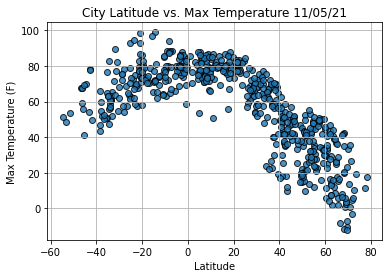

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

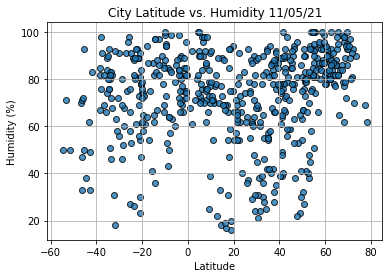

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

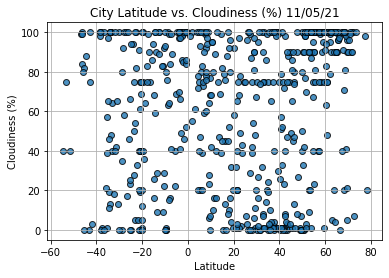

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

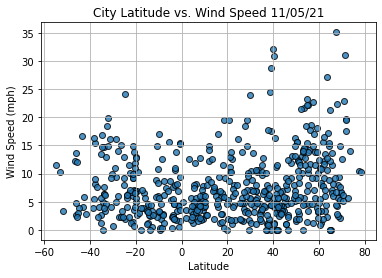

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]

In [23]:
index13

City                    Veisiejai
Country                        LT
Date          2021-11-06 03:18:28
Lat                          54.1
Lng                          23.7
Max Temp                    44.69
Humidity                       76
Cloudiness                    100
Wind Speed                  14.63
Name: 13, dtype: object

In [24]:
# We can also filter a DataFrame based on a value of a row
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
550    False
551     True
552    False
553     True
554     True
Name: Lat, Length: 555, dtype: bool

In [25]:
# DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, loc method
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Broome,US,2021-11-06 03:18:22,42.2506,-75.8330,35.01,72,8,3.00
2,Sibolga,ID,2021-11-06 03:17:07,1.7427,98.7792,76.80,92,100,3.49
3,Nikolskoye,RU,2021-11-06 03:18:23,59.7035,30.7861,44.87,82,100,10.11
4,Ulaangom,MN,2021-11-06 03:18:24,49.9811,92.0667,14.72,63,80,1.61
5,Tynda,RU,2021-11-06 03:18:24,55.1667,124.7167,11.84,51,23,10.09


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

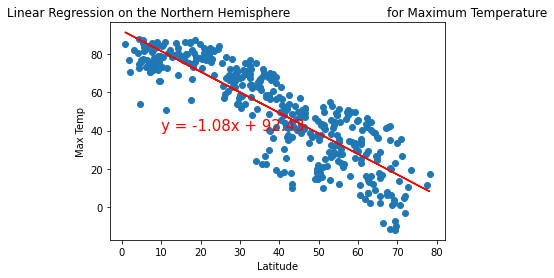

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

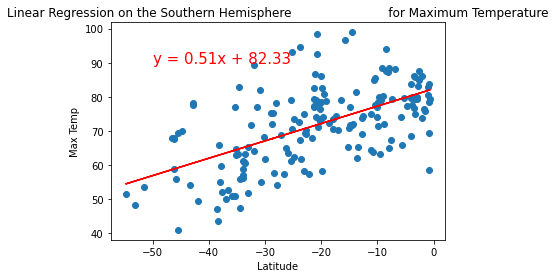

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

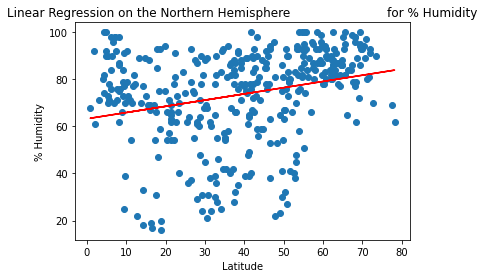

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

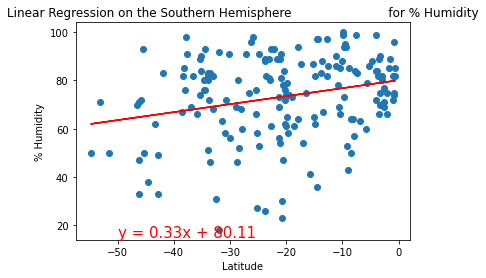

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

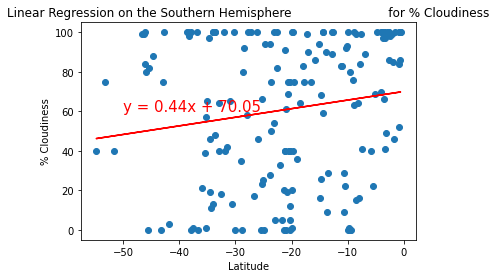

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

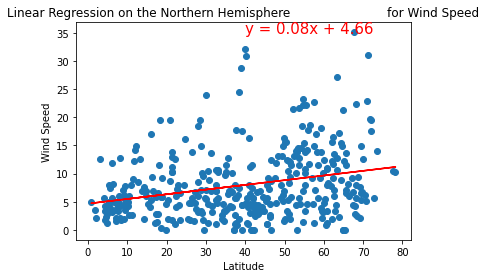

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

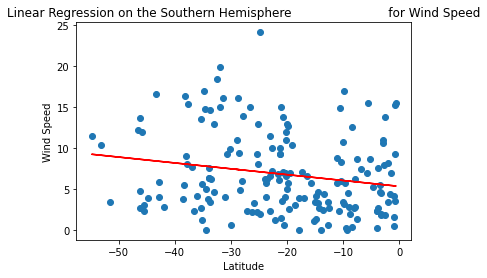

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))